# Data Preperation Version3
by Wenying Wu 14007025

Prerequisite:
- Docker

Sections:
- EDA
- Data Preperation

**NOTE:** This version of data preparation is created because the first and second versions are not performing well on the nerual network model. And I found Akshaj Verma's article on https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab. He used Weighted Sampling when splitting dataset and a more complex neural network architecture than the one in lab 3. This notebook and neural_network_model4.ipynb are following the methodology Akshaj used to experiment the result. 

## 1. EDA on dataset

### 1.1 Load magic command

In [1]:
%load_ext autoreload
%autoreload 2

### 1.2 Import packages and data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Check working directory
!pwd

/home/jovyan/work/notebooks


In [4]:
# Read dataset in df
df = pd.read_csv('../data/raw/beer_reviews.csv')

### 1.3 EDA

In [5]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
df.shape

(1586614, 13)

In [7]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [9]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**Note:** 57.7 beer_abv seems impossible, but according to research, there are a few beers with abv over 57.7. So data is deemed to be cleaned at this point.

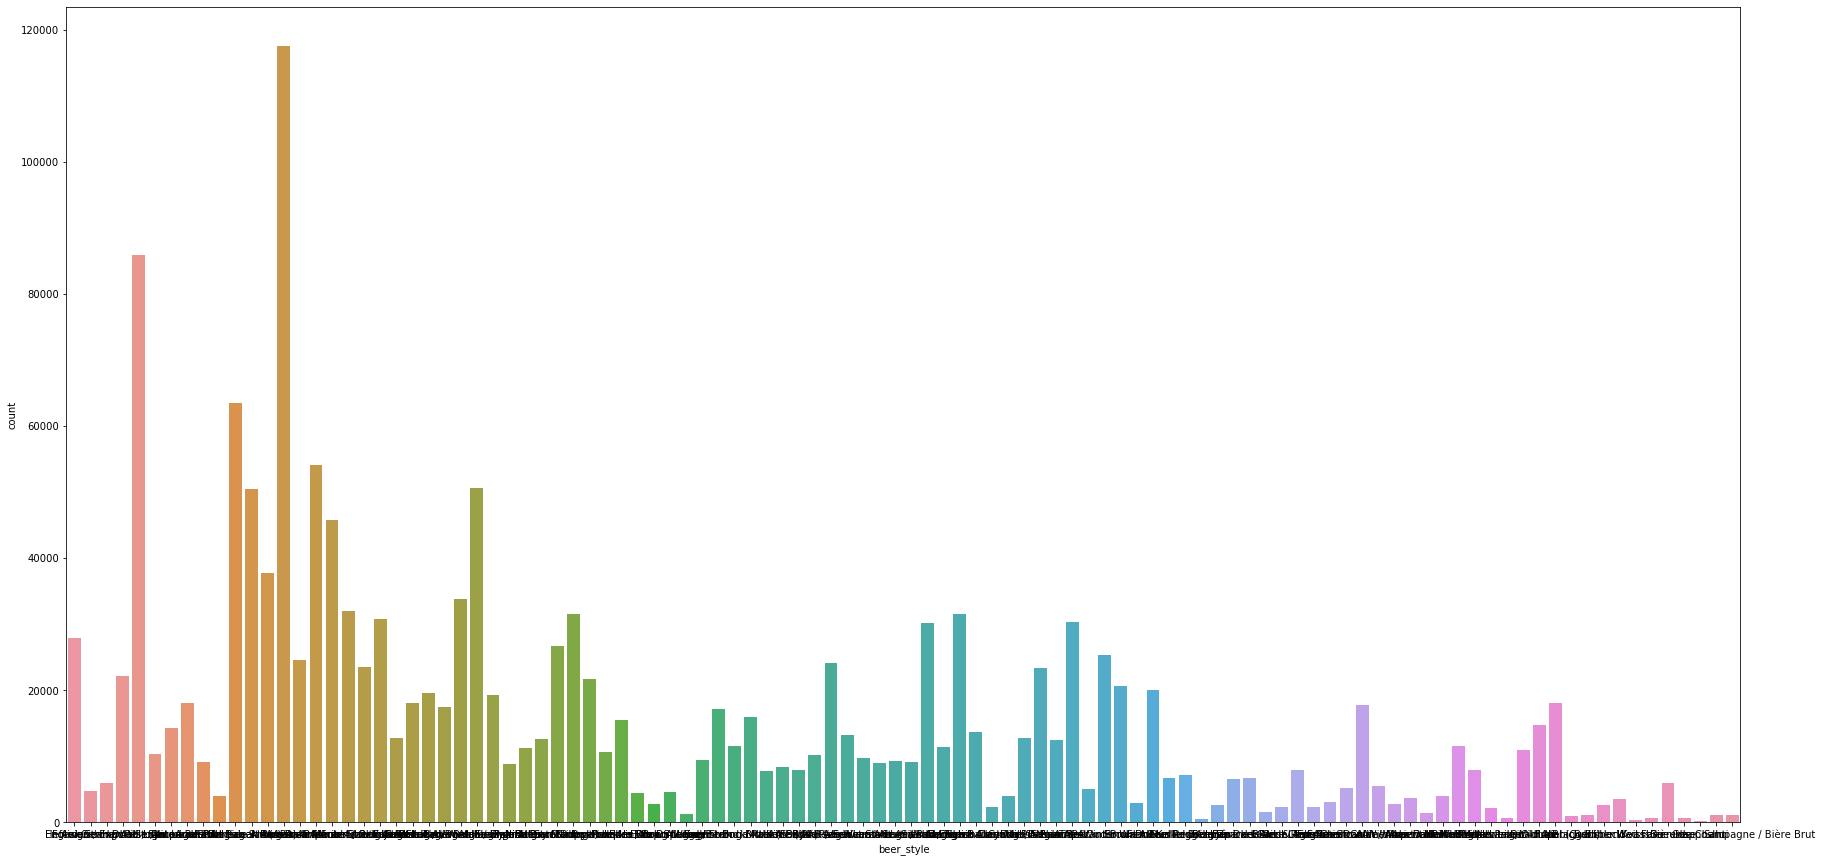

In [10]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x = 'beer_style', data=df)

**Note:** Imbalanced dataset detected, SMOTE or other methods to improve model performance might required.

In [11]:
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [12]:
df['beer_style'].value_counts()/len(df)*100

American IPA                        7.411128
American Double / Imperial IPA      5.418898
American Pale Ale (APA)             4.000280
Russian Imperial Stout              3.411605
American Double / Imperial Stout    3.195799
                                      ...   
Gose                                0.043237
Faro                                0.038384
Roggenbier                          0.029371
Kvass                               0.018719
Happoshu                            0.015190
Name: beer_style, Length: 104, dtype: float64

**Note:** Highest percentage of a beer style is 7.4% and the lowest is 0.015%

**Check for categorical columns**

In [13]:
cat_cols = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']

In [14]:
from src.data.data_ast2 import show_cat_col_info
show_cat_col_info(df,cat_cols)

Column - brewery_name: 5743 unique values
['Vecchio Birraio' 'Caldera Brewing Company' 'Amstel Brouwerij B. V.' ...
 'Wissey Valley Brewery' 'Outback Brewery Pty Ltd'
 'Georg Meinel Bierbrauerei KG']

Column - review_profilename: 33388 unique values
['stcules' 'johnmichaelsen' 'oline73' ... 'hogshead' 'NyackNicky'
 'joeebbs']

Column - beer_style: 104 unique values
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adjunct Lager' 'American Blonde Ale' 'Euro Pale Lager'
 'English Brown Ale' 'Scotch Ale / Wee Heavy' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Ir

**Check for null values**

In [15]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [16]:
df.brewery_name.isnull().sum()/len(df)*100

0.0009454095325012889

In [17]:
df.beer_abv.isnull().sum()/len(df)*100

4.272305677373325

Only small amount of data (around 4%) contains null value, given the total data amount is big enough, decide to drop these rows containing null value

### 1.4 EDA summary

From the Assignment breif, API Expected Parameter are: ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'].
All variables are numerical except for 'brewery_name' and no major data problem was found. Two minor problem was found and data will be cleaned accordingly:
- 'beer_abv' has values seems wrong (max=57.7): Research shown this value is possible, no cleaning required. 
- Around 4% null value was found in 'brewery_name' and 'beer_abv': these rows are to be deleted given the dataset is considerably big.

In [18]:
input_cols = ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
# feature to be predicted: 
target = 'beer_style'

**Columns that are not in input_cols except for the target 'beer_style' are to be dropped.**

In [19]:
cols_to_drop = [i for i in df.columns if i not in input_cols and i != target]
cols_to_drop

['brewery_id',
 'review_time',
 'review_overall',
 'review_profilename',
 'beer_name',
 'beer_beerid']

## 2. Prep Data

In [58]:
# Make a copy
df_cleaned = df.copy()

### 2.1 Drop null rows

In [59]:
df_cleaned = df_cleaned.dropna()

Check for shape and classification distribution

In [60]:
df_cleaned.shape

(1518478, 13)

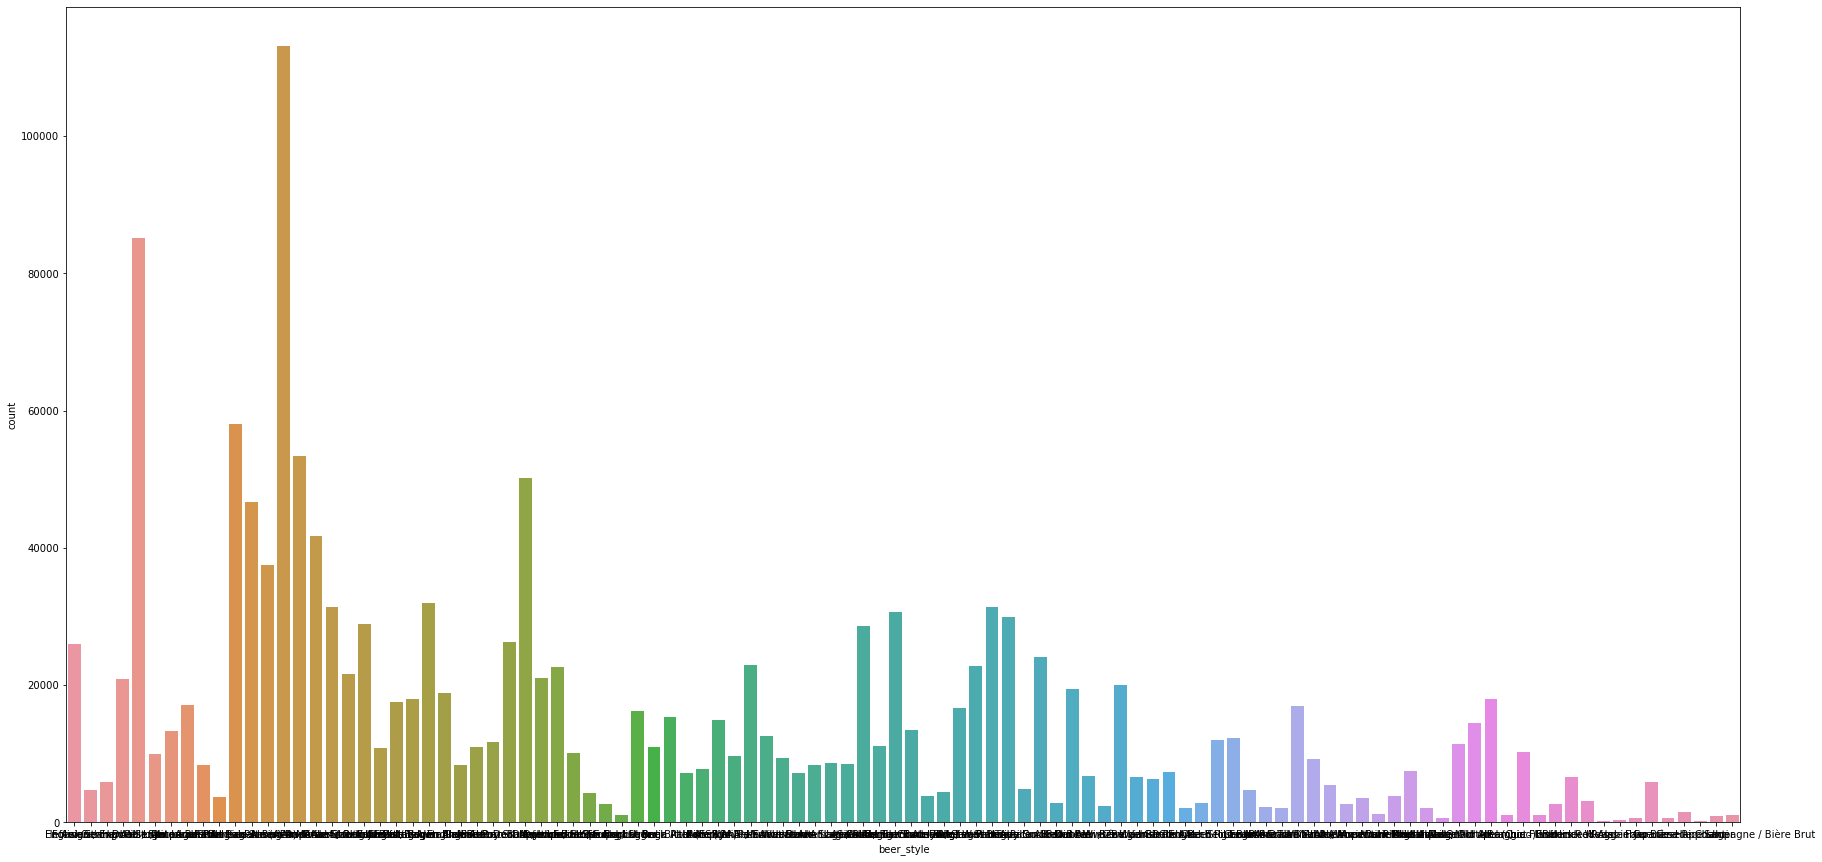

In [61]:
plt.figure(figsize=(30,15))
sns.countplot(x = 'beer_style', data=df_cleaned)

Looks like the distribution is the same as the one before na rows are dropped.

### 2.2 Encode categorical columns

In [62]:
from src.data.data_ast2 import create_cats_dict, generate_cat_mapping_dict
cats_dict = create_cats_dict(df_cleaned,cat_cols)
# cats_dict is too long, not displaying here

Get category: number dictionary for later use

In [63]:
# get mapping of numerical and categotical value in dictionary format
brewery_name_dict = generate_cat_mapping_dict(df_cleaned,'brewery_name')
review_profilename_dict = generate_cat_mapping_dict(df_cleaned,'review_profilename')
beer_style_dict = generate_cat_mapping_dict(df_cleaned,'beer_style')
beer_name_dict = generate_cat_mapping_dict(df_cleaned,'beer_name')

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
# not using onehotencoding as there are too many categories, memory consumption is high
# try different scaler:Standard, Minmax and robust

In [65]:
cats_dict.keys()

dict_keys(['brewery_name', 'review_profilename', 'beer_style', 'beer_name'])

In [66]:
# Use Label encoder instead of ordinal encoder because these variables are not ordinal
for col, cats in cats_dict.items():
    col_encoder = LabelEncoder()
    df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
df_cleaned.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,4886,1234817823,1.5,2.0,2.5,30121,65,1.5,1.5,34371,5.0,47986
1,10325,4886,1235915097,3.0,2.5,3.0,30121,51,3.0,3.0,32297,6.2,48213
2,10325,4886,1235916604,3.0,2.5,3.0,30121,59,3.0,3.0,5313,6.5,48215
3,10325,4886,1234725145,3.0,3.0,3.5,30121,61,2.5,3.0,34370,5.0,47969
4,1075,1360,1293735206,4.0,4.5,4.0,22693,9,4.0,4.5,8745,7.7,64883
5,1075,1360,1325524659,3.0,3.5,3.5,26755,66,3.0,3.5,8085,4.7,52159
6,1075,1360,1318991115,3.5,3.5,3.5,10055,66,4.0,4.0,8085,4.7,52159
7,1075,1360,1306276018,3.0,2.5,3.5,13759,66,2.0,3.5,8085,4.7,52159
8,1075,1360,1290454503,4.0,3.0,3.5,7575,66,3.5,4.0,8085,4.7,52159
9,1075,1360,1285632924,4.5,3.5,5.0,14188,66,4.0,4.0,8085,4.7,52159


### 2.3 Drop columns (defined in EDA)

In [68]:
#drop columns
df_cleaned = df_cleaned.drop(cols_to_drop, axis=1)

In [69]:
df_cleaned.shape

(1518478, 7)

In [70]:
df_cleaned

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,4886,2.0,2.5,65,1.5,1.5,5.0
1,4886,2.5,3.0,51,3.0,3.0,6.2
2,4886,2.5,3.0,59,3.0,3.0,6.5
3,4886,3.0,3.5,61,2.5,3.0,5.0
4,1360,4.5,4.0,9,4.0,4.5,7.7
...,...,...,...,...,...,...,...
1586609,4617,4.0,3.5,85,4.0,4.0,5.2
1586610,4617,5.0,2.5,85,2.0,4.0,5.2
1586611,4617,3.5,3.0,85,3.5,4.0,5.2
1586612,4617,4.5,4.5,85,4.5,4.5,5.2


### 2.4 Separate input and output data

In [71]:
# Make a copy
df_data = df_cleaned.copy()

In [72]:
y = pd.DataFrame(df_data.pop('beer_style'))
X = df_data

**Split Dataset**

In [73]:
from sklearn.model_selection import train_test_split
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=0)

In [74]:
y_test

,beer_style
1538440,17
586313,12
1011371,37
953832,73
1264607,89
...,...
461337,60
1039474,19
225435,21
1031071,37


In [75]:
# Check datatype
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 6 columns):
brewery_name         1518478 non-null int64
review_aroma         1518478 non-null float64
review_appearance    1518478 non-null float64
review_palate        1518478 non-null float64
review_taste         1518478 non-null float64
beer_abv             1518478 non-null float64
dtypes: float64(5), int64(1)
memory usage: 81.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 1 columns):
beer_style    1518478 non-null int64
dtypes: int64(1)
memory usage: 23.2 MB


(None, None)

### 2.5 Standardise Dataset

Can change scaler in later experiments

In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = X_train.to_numpy(), y_train.to_numpy() 
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()   
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [38]:
y_test

array([[17],
       [12],
       [37],
       ...,
       [21],
       [37],
       [14]])

### 2.6 Visualize Class Distribution in Train, Val, and Test

In [38]:
from src.data.data_ast2 import get_class_distribution

In [41]:
### 删掉
def get_class_distribution(obj, beer_style_dict):
    dict_length = len(beer_style_dict)
    helper_list = list(range(104))
    count_dict = dict()
    for i in helper_list:
        count_dict[f"type_{str(i)}"] = 0
    
    for i in obj:
        if i in helper_list:
            count_dict[f"type_{i}"] +=1              
            
    return count_dict

In [43]:
helper_list = list(range(104))
count_dict = dict()
for i in helper_list:
    count_dict[f"type_{str(i)}"] = 0

In [44]:
type(y_test)

numpy.ndarray

In [46]:
y_test[0][0]

17

In [42]:
### 删掉
get_class_distribution(y_test, beer_style_dict)

KeyError: 'type_[17]'

Text(0.5, 1.0, 'Class Distribution in Test Set')

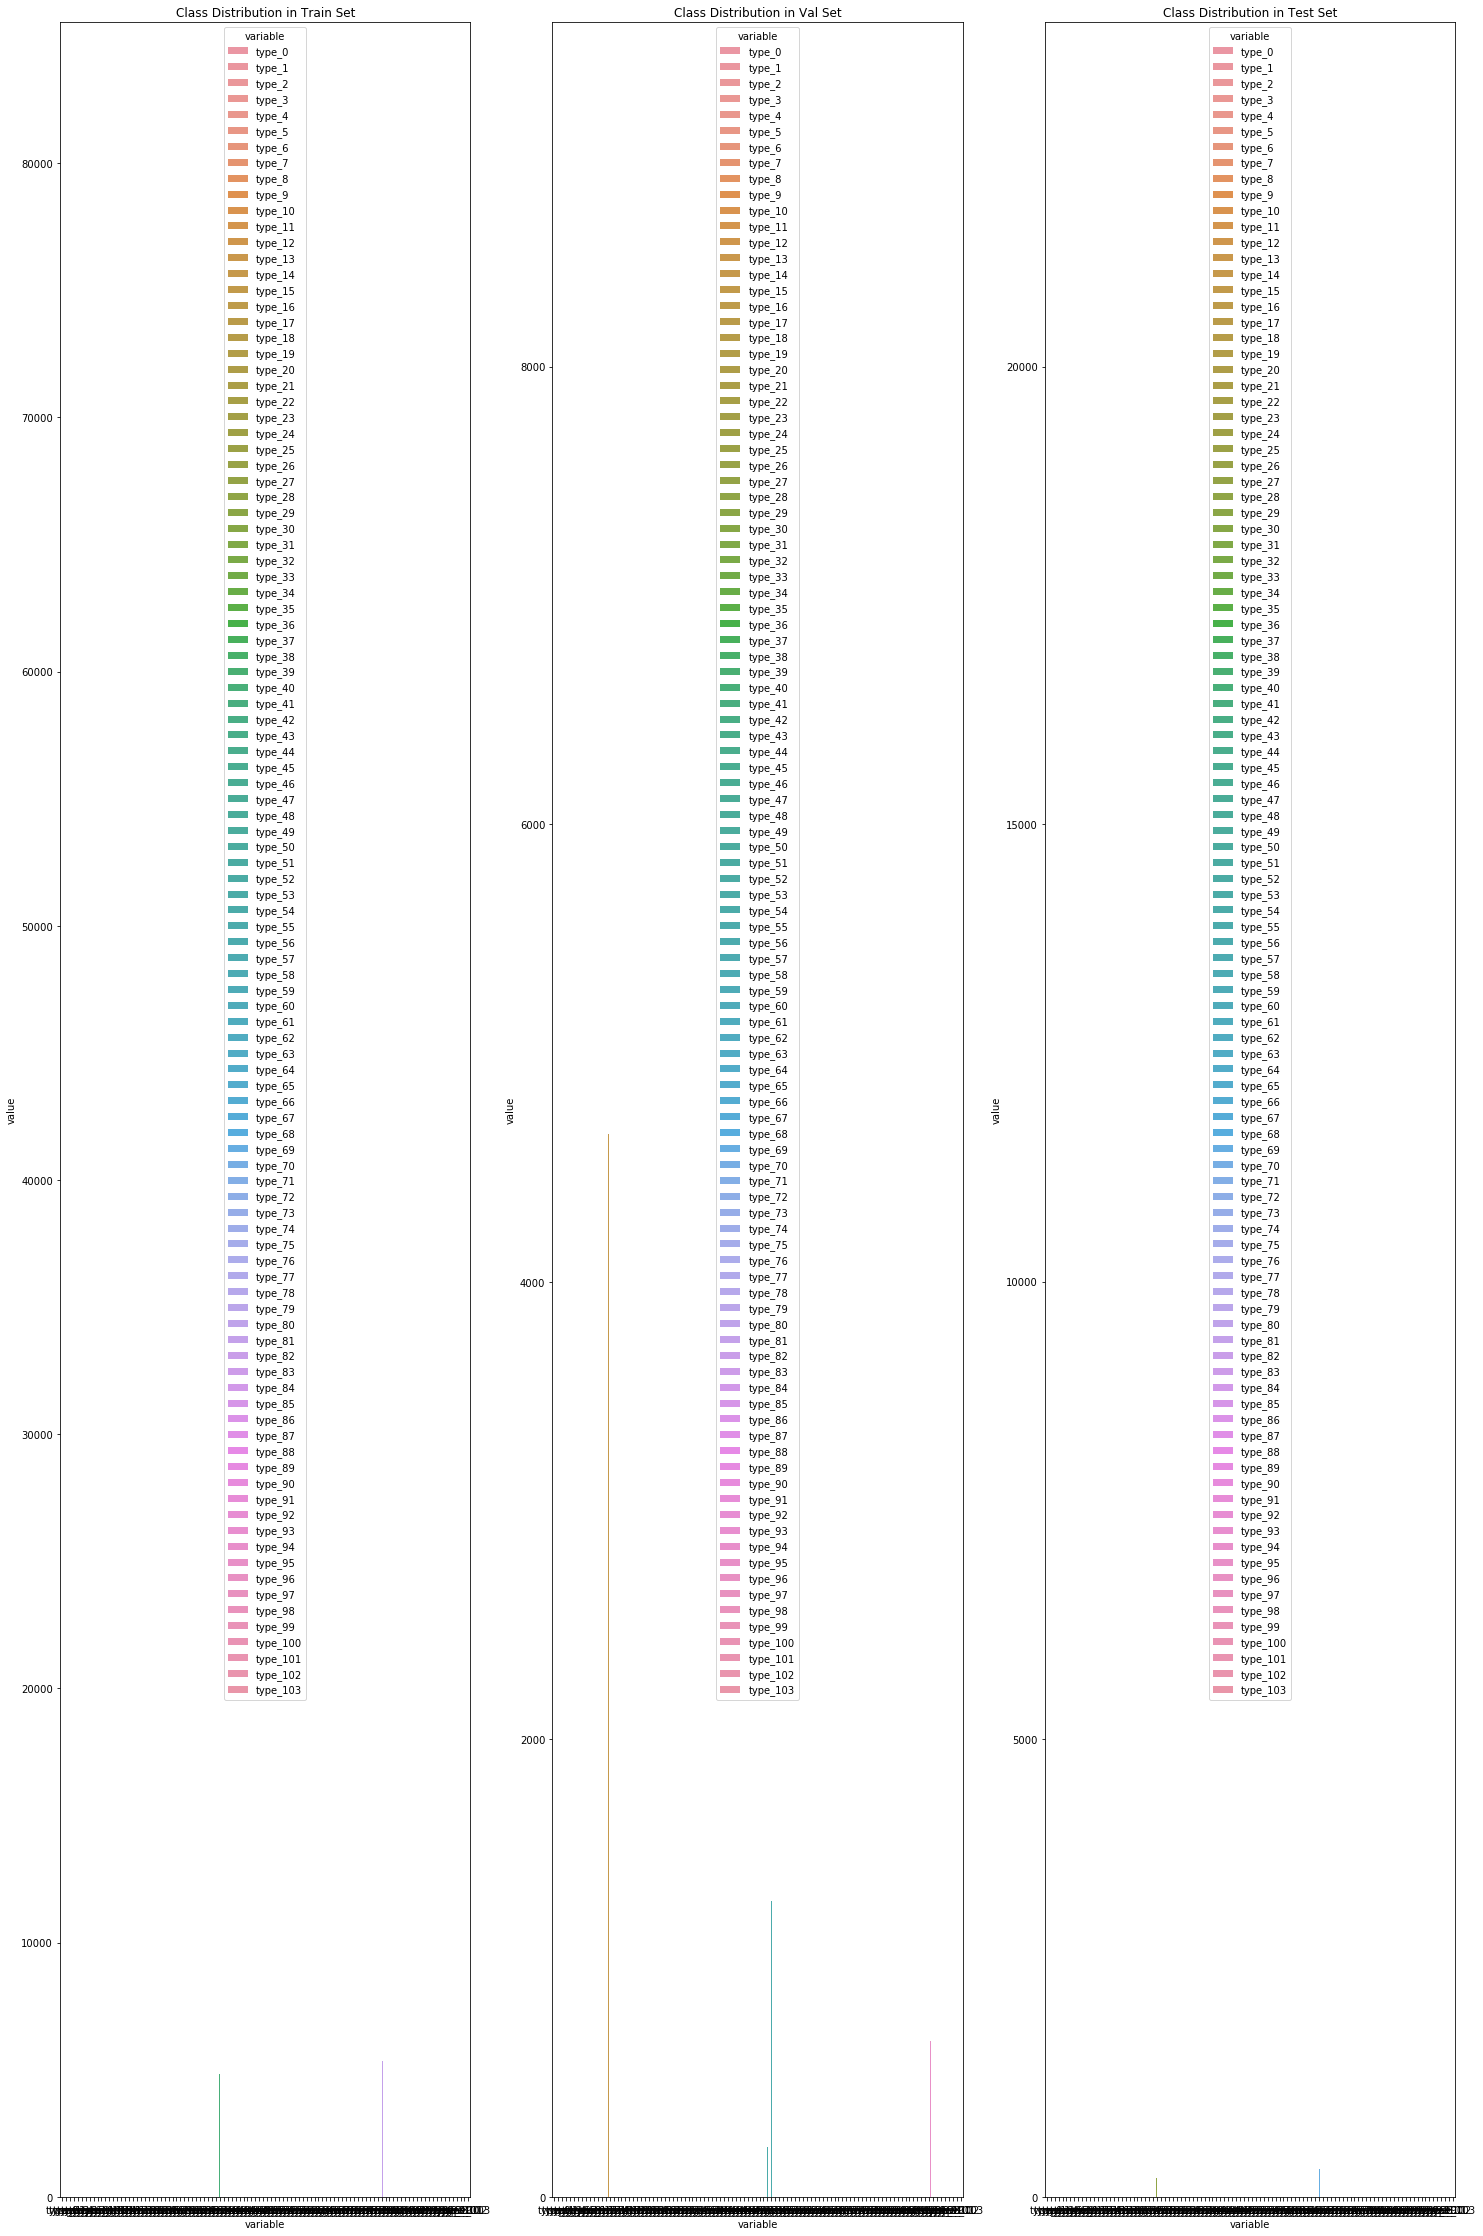

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,40))

# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train, beer_style_dict)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val, beer_style_dict)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test, beer_style_dict)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

We can see the imbalance distribution of data is significant, will do oversampling in the model notebook

### 2.7 Save datasets and dictionaries

In [39]:
from src.data.sets import save_sets
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')

In [40]:
from src.data.data_ast2 import save_dicts
save_dicts(brewery_name_dict=brewery_name_dict, beer_style_dict=beer_style_dict)